In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [4]:
df = pd.read_csv("csv/feedback.csv")
df.columns = df.columns.str.strip()

In [ ]:
df['Experimento Controlado']

In [9]:
motiv_cols = ["Estudo de caso", "Experimento Controlado", "Survey", 
              "Revisão Sistemática da Literatura (RSL)", 
              "Análise Estatística de Experimentos", 
              "Análise Qualitativa"]

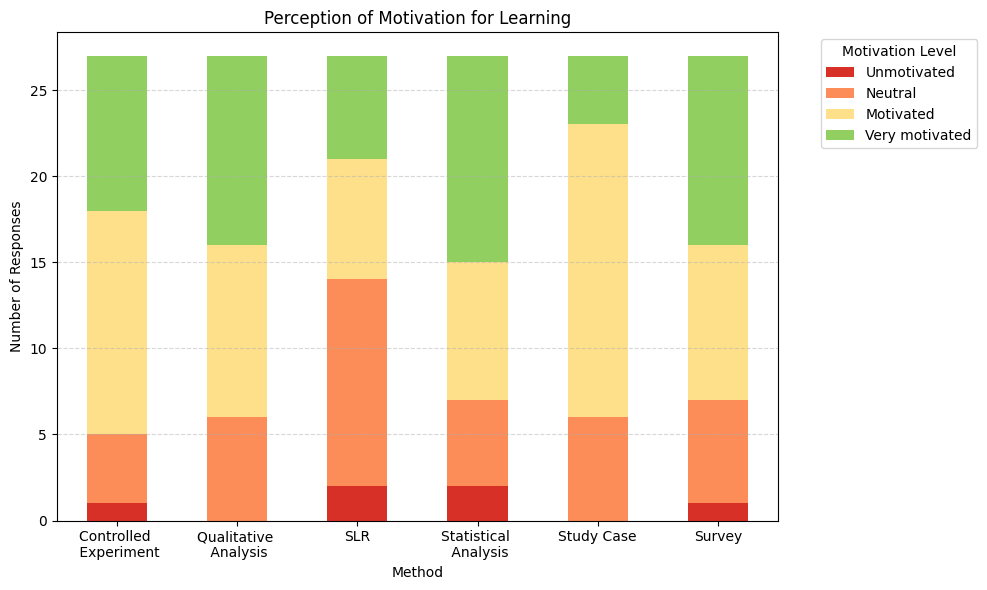

In [12]:
# Gera uma tabela com as contagens de cada resposta por coluna
df_meltado = df[motiv_cols].melt(var_name='Method', value_name='Answer')

renomear_metodos = {
    'Análise Estatística de Experimentos': 'Statistical \n Analysis',
    'Análise Qualitativa': 'Qualitative \n Analysis',
    'Estudo de caso': 'Study Case',
    'Revisão Sistemática da Literatura (RSL)': 'SLR',
    'Experimento Controlado' : 'Controlled \n Experiment'
}

translate_answers_en = {
    "Desmotivado(a)": 'Unmotivated',
    "Neutro(a)": 'Neutral',
    "Motivado(a)": 'Motivated',
    "Muito motivado(a)": 'Very motivated'
}

# Aplica o replace diretamente na coluna 'Answer'
df_meltado['Answer'] = df_meltado['Answer'].replace(translate_answers_en)

df_meltado['Method'] = df_meltado['Method'].replace(renomear_metodos)

# Conta as respostas por método
contagem_en = pd.crosstab(df_meltado['Method'], df_meltado['Answer'])

# Ordena as colunas com base na ordem desejada das respostas em inglês
answer_order_en_motivation = ['Unmotivated', 'Neutral', 'Motivated', 'Very motivated']
ordered_columns = [col for col in answer_order_en_motivation if col in contagem_en.columns]
contagem_en = contagem_en[ordered_columns]

# Cores personalizadas
colors = ['#d73027', '#fc8d59', '#fee08b', '#91cf60']  # Ajustado para 4 cores

# Gráfico de barras empilhadas
num_categorias = contagem_en.shape[1]
if num_categorias > len(colors):
    import matplotlib.cm as cm
    cmap = cm.get_cmap('viridis', num_categorias)
    colors = [cmap(i) for i in range(num_categorias)]
elif num_categorias < len(colors):
    colors = colors[:num_categorias]

contagem_en.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title("Perception of Motivation for Learning")
plt.ylabel("Number of Responses")
plt.xlabel("Method")
plt.xticks(rotation=0)
plt.legend(title="Motivation Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()